<a href="https://colab.research.google.com/github/pattrick2200/complete-sql-mastery/blob/main/Electric_Vehicle_Population_Data_Analysis_alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install pandas dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 70.7 MB/s eta 0:00:00


In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/CSV File/Electric_Vehicle_Population_Data.csv')
df.head()


,Vehical_identity_number,County_name,City_name,State_code,Postal_code,Model_Year,maker_name,model_name,Electric_Vehicle_Type,Clean _Alternative_Fuel_Vehicle_Eligibility,Electric_Range,Base _MSRP,Legislative_District,Vehicle_ID,Vehicle_Location,Electric_Utility,Census_Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


In [22]:
# View structure and columns
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Vehical_identity_number                      250659 non-null  object 
 1   County_name                                  250653 non-null  object 
 2   City_name                                    250653 non-null  object 
 3   State_code                                   250659 non-null  object 
 4   Postal_code                                  250653 non-null  float64
 5   Model_Year                                   250659 non-null  int64  
 6   maker_name                                   250659 non-null  object 
 7   model_name                                   250659 non-null  object 
 8   Electric_Vehicle_Type                        250659 non-null  object 
 9   Clean _Alternative_Fuel_Vehicle_Eligibility  250659 non-nul

Index(['Vehical_identity_number', 'County_name', 'City_name', 'State_code',
       'Postal_code', 'Model_Year', 'maker_name', 'model_name',
       'Electric_Vehicle_Type', 'Clean _Alternative_Fuel_Vehicle_Eligibility',
       'Electric_Range', 'Base _MSRP', 'Legislative_District', 'Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', 'Census_Tract'],
      dtype='object')

In [33]:
print(df.head())

  Vehical_identity_number County_name  City_name State_code  Postal_code  \
0              5YJSA1E65N      Yakima    Granger         WA      98932.0   
1              KNDC3DLC5N      Yakima     Yakima         WA      98902.0   
2              5YJYGDEEXL   Snohomish    Everett         WA      98208.0   
3              3C3CFFGE1G      Yakima     Yakima         WA      98908.0   
4              KNDCC3LD5K      Kitsap  Bremerton         WA      98312.0   

   Model_Year maker_name model_name                   Electric_Vehicle_Type  \
0        2022      TESLA    MODEL S          Battery Electric Vehicle (BEV)   
1        2022        KIA        EV6          Battery Electric Vehicle (BEV)   
2        2020      TESLA    MODEL Y          Battery Electric Vehicle (BEV)   
3        2016       FIAT        500          Battery Electric Vehicle (BEV)   
4        2019        KIA       NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   

         Clean _Alternative_Fuel_Vehicle_Eligibility  Electric_Range

In [23]:
# Check for missing values
df.isnull().sum()

# Optional: Fill missing values or drop columns if needed
# df.fillna('Unknown', inplace=True)
# df = df.drop(columns=['VIN (1-10)'], errors='ignore')

,0
Vehical_identity_number,0
County_name,6
City_name,6
State_code,0
Postal_code,6
Model_Year,0
maker_name,0
model_name,0
Electric_Vehicle_Type,0
Clean _Alternative_Fuel_Vehicle_Eligibility,0


In [35]:
df['maker_name'].value_counts().head(10)

,count
maker_name,
TESLA,105253
CHEVROLET,18223
NISSAN,16085
FORD,13492
KIA,12171
BMW,10551
TOYOTA,10429
HYUNDAI,8328
RIVIAN,7637


In [36]:
df['City_name'].value_counts().head(10)

,count
City_name,
Seattle,39768
Bellevue,12204
Vancouver,9322
Redmond,8653
Bothell,8253
Kirkland,7163
Sammamish,7021
Renton,6893
Olympia,5958


In [37]:
df['Electric_Vehicle_Type'].value_counts()

,count
Electric_Vehicle_Type,
Battery Electric Vehicle (BEV),199538
Plug-in Hybrid Electric Vehicle (PHEV),51121


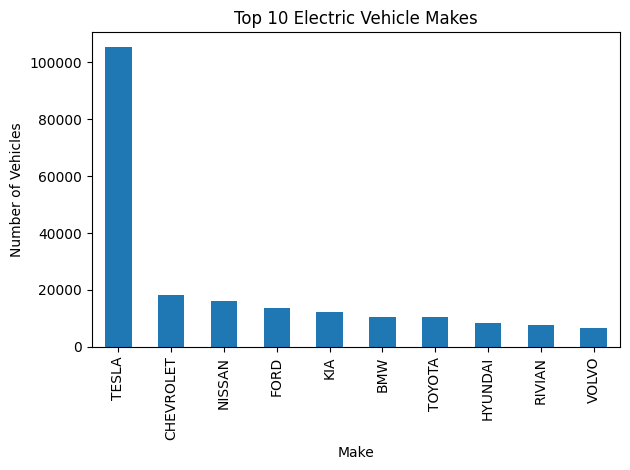

In [25]:
top_makes = df['maker_name'].value_counts().head(10)
top_makes.plot(kind='bar', title='Top 10 Electric Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

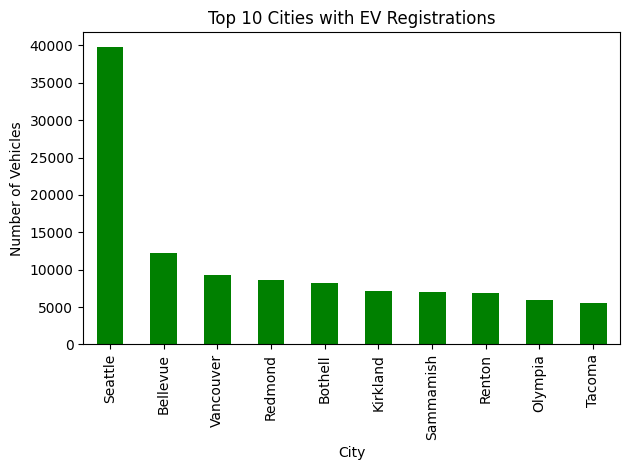

In [27]:
top_cities = df['City_name'].value_counts().head(10)
top_cities.plot(kind='bar', title='Top 10 Cities with EV Registrations', color='green')
plt.xlabel('City')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

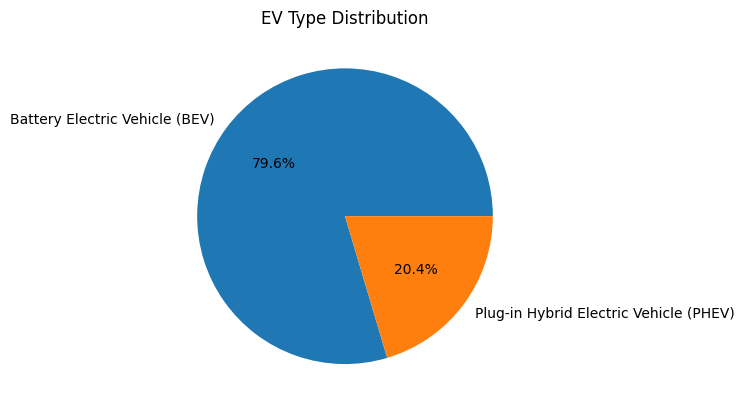

In [29]:
ev_types = df['Electric_Vehicle_Type'].value_counts()
ev_types.plot(kind='pie', autopct='%1.1f%%', title='EV Type Distribution')
plt.ylabel('')
plt.show()

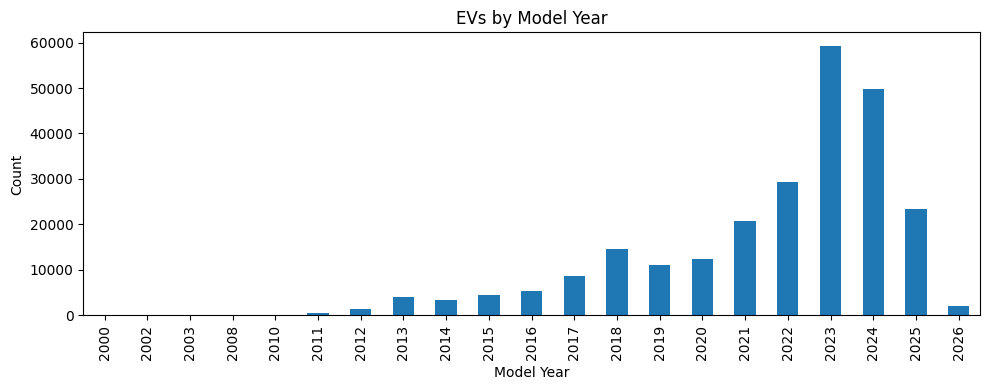

In [32]:
if 'Model_Year' in df.columns:
    df['Model_Year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 4), title='EVs by Model Year')
    plt.xlabel('Model Year')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print('Model Year column not available.')